## Project: Communicating Findings (Prosper Loan Data)

### Submitted by: Ahmed Mohamed Hussein Unshur

----------------------------

## Overview


[Prosper](https://www.prosper.com/) is a peer-to-peer lending company based in San Francisco, CA, USA. The following investigation was conducted to explore loan data from the Company. The Original dataset contains 113,937 loans with 81 variables on each loan. This presentation presents insights related to borrowers Annual Percentage Rate (APR) and original loan amount.





## Wrangling

### NOTE: Markdown and Code cells that are related to the wrangling were set as *'Skip'* when  rendering the HTML slide show. So, they will not show up in the presentation.

In this section, we will conduct a preliminary wrangling on the dataset and describe its properties.

But first, we will import required packages and load the dataset into a Pandas dataframe. Finally, we will motivate our exploration goals.

In [1]:
# Import required packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Enable inline plotting.
%matplotlib inline

# Suppress warnings from final output.
import warnings
warnings.simplefilter("ignore")

In [2]:
# Load dataset.
loan_data = pd.read_csv('prosperLoanData.csv')

# Show all columns of the dataset.
pd.set_option('display.max_columns', None)

In [3]:
# Print number of columns and rows within the dataset.
print(loan_data.shape)

# View the first 10 rows of the dataset.
loan_data.head(10)

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

The dataset contains 113,937 rows (loans) and 81 columns (features).

We are interested in finding out what features affect the borrower's Annual Percentage Rate (APR) and the original loan amount.

We think that the following features with help support our investigation into the features of interest:
loan term, Prosper rating, Prosper score, borrower's income range, and their home ownership status.


For this reason, we will only select columns of those features and then clean the data.

In [4]:
# Select 8 features from the dataset.
loan_data = loan_data[['LoanKey', 'LoanOriginalAmount', 'BorrowerAPR',
                       'Term', 'ProsperRating (Alpha)', 'ProsperScore',
                       'IncomeRange', 'IsBorrowerHomeowner']]

In [5]:
# View the first 5 rows of the dataframe.
loan_data.head()

,LoanKey,LoanOriginalAmount,BorrowerAPR,Term,ProsperRating (Alpha),ProsperScore,IncomeRange,IsBorrowerHomeowner
0,E33A3400205839220442E84,9425,0.16516,36,NaN,NaN,"$25,000-49,999",True
1,9E3B37071505919926B1D82,10000,0.12016,36,A,7.0,"$50,000-74,999",False
2,6954337960046817851BCB2,3001,0.28269,36,NaN,NaN,Not displayed,False
3,A0393664465886295619C51,10000,0.12528,36,A,9.0,"$25,000-49,999",True
4,A180369302188889200689E,15000,0.24614,36,D,4.0,"$100,000+",True


In [6]:
# Show concise summary of the dataframe.
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LoanKey                113937 non-null  object 
 1   LoanOriginalAmount     113937 non-null  int64  
 2   BorrowerAPR            113912 non-null  float64
 3   Term                   113937 non-null  int64  
 4   ProsperRating (Alpha)  84853 non-null   object 
 5   ProsperScore           84853 non-null   float64
 6   IncomeRange            113937 non-null  object 
 7   IsBorrowerHomeowner    113937 non-null  bool   
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 6.2+ MB


In [7]:
# Show sum of duplicates.
loan_data.duplicated().sum()

0

The new dataframe contains 113937 rows and 8 columns with no duplicates. But there are some columns with missing values.

In [8]:
# Show total missing values in column.
loan_data.isna().sum()

LoanKey                      0
LoanOriginalAmount           0
BorrowerAPR                 25
Term                         0
ProsperRating (Alpha)    29084
ProsperScore             29084
IncomeRange                  0
IsBorrowerHomeowner          0
dtype: int64

The output above shows that `BorrowerAPR` has 25 missing values, and `ProsperRating (Alpha)` and `ProsperScore` with missing values of 29084.

In [9]:
# Drop rows with missing values.
loan_data.dropna(inplace = True)

In [10]:
# Show total missing values in column.
loan_data.isna().sum()

LoanKey                  0
LoanOriginalAmount       0
BorrowerAPR              0
Term                     0
ProsperRating (Alpha)    0
ProsperScore             0
IncomeRange              0
IsBorrowerHomeowner      0
dtype: int64

In [11]:
# Show summary of the dataframe.
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LoanKey                84853 non-null  object 
 1   LoanOriginalAmount     84853 non-null  int64  
 2   BorrowerAPR            84853 non-null  float64
 3   Term                   84853 non-null  int64  
 4   ProsperRating (Alpha)  84853 non-null  object 
 5   ProsperScore           84853 non-null  float64
 6   IncomeRange            84853 non-null  object 
 7   IsBorrowerHomeowner    84853 non-null  bool   
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 5.3+ MB


Final dataset contains 84853 rows and 8 columns.



### Relationship Between Borrower Annual Percentage Rate (APR) and Original Loan Amount

Borrower APR is negatively correlated with original loan amount, meaning that an increase in loan amount is correlated with a decrease in annual percentage rate.

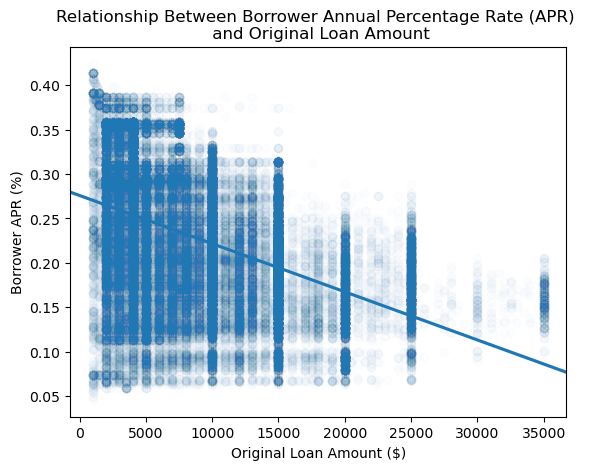

In [12]:
# Visualize relationship between borrower APR and laon amount using Seaborn's regplot() function.
sb.regplot(data = loan_data, x = 'LoanOriginalAmount', y = 'BorrowerAPR', 
           truncate = False, scatter_kws = {'alpha':0.01})
plt.title('Relationship Between Borrower Annual Percentage Rate (APR) \n and Original Loan Amount')
plt.xlabel('Original Loan Amount ($)')
plt.ylabel('Borrower APR (%)')
plt.show()

### Relationship Between Original Loan Amount and Income Range

Borrowers with higher income range take larger loan amounts.

In [13]:
# Function to create violin plot with Seaborn.
def violinplot(i, a):
    plt.figure(figsize = [7, 4]) 
    color = sb.color_palette()[0]
    sb.violinplot(data = loan_data, x = i, y = a, color = color);

In [14]:
# Income ranges.
income_range = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']

# Return income range with categories and orderedness
income = pd.api.types.CategoricalDtype(ordered = True, categories = income_range)

# Convert 'IncomeRange' column into an ordered categorical type. 
loan_data['IncomeRange'] = loan_data['IncomeRange'].astype(income);

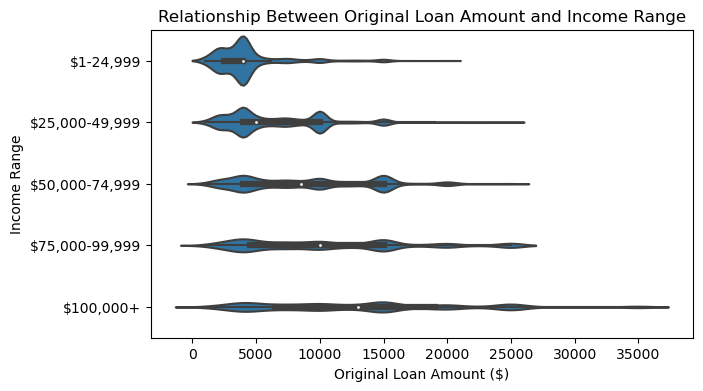

In [15]:
# Visualize relationship between loan amount and home ownership using Seaborn's viollinplot() function.
violinplot('LoanOriginalAmount', 'IncomeRange')
plt.title('Relationship Between Original Loan Amount and Income Range')
plt.xlabel('Original Loan Amount ($)')
plt.ylabel('Income Range')
plt.show()

### Relationship Between Borrower APR , Prosper Score, and Loan Term

Loans of 12 months, 36 months, and 60 months don't differ in terms of Borrower's APR and the Prosper score, which means that the length of the loan doesn't affect APR and Prosper score.

In [16]:
# Generate a random sample of 500 from the dataset.
sample = np.random.choice(loan_data.shape[0], 300, replace = False)
loan_data = loan_data.reindex(sample)

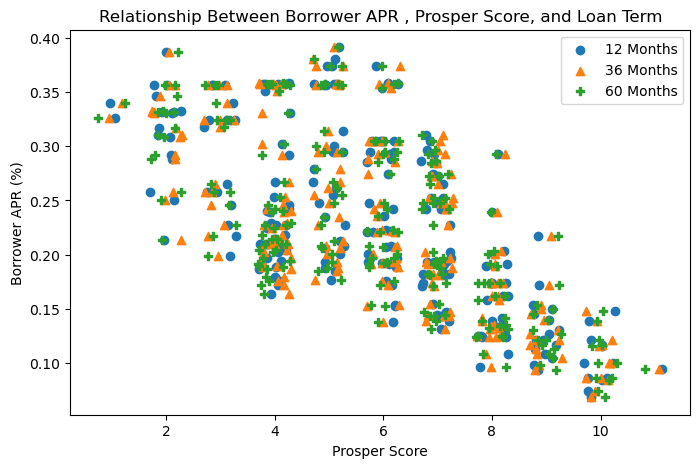

In [18]:
# Visualize relationship between borrower APR, Prosper score, and term using Seaborn's regplot() function.
# Set plot figure size.
plt.figure(figsize = [8, 5])
# Set list of lists for the markers.
term_markers = [['12', 'o'], ['36', '^'], ['60', 'P']]
# Loop over the list elements.
for term, marker in term_markers:
    plot_data = loan_data[loan_data['Term'] == term]
    sb.regplot(data = loan_data, x = 'ProsperScore', y = 'BorrowerAPR', 
           fit_reg = False, scatter_kws = {'alpha' : 1/1}, x_jitter = 0.3, marker = marker)   
# Set labels and legend.
plt.title('Relationship Between Borrower APR , Prosper Score, and Loan Term')
plt.xlabel('Prosper Score')
plt.ylabel('Borrower APR (%)')
plt.legend(['12 Months', '36 Months', '60 Months'])
plt.show()